In [386]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [92]:
movies = pd.read_csv(r"C:\Users\akaft\OneDrive\Desktop\Pandas\movie.csv",sep = ',', parse_dates=['genres'])
movies.head()#parse_dates not worked genres is NOT a date column ❌
            #It's usually a text (string) column like:

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [94]:
print(type(movies))

<class 'pandas.core.frame.DataFrame'>


In [96]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [98]:
ratings = pd.read_csv(r"C:\Users\akaft\OneDrive\Desktop\Pandas\rating.csv",sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [105]:
tags = pd.read_csv(r"C:\Users\akaft\OneDrive\Desktop\Pandas\tag.csv")
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [109]:
tags = pd.read_csv(r"C:\Users\akaft\OneDrive\Desktop\Pandas\tag.csv",sep=',',parse_dates=['timestamp'])
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [111]:
del ratings['timestamp']
del tags['timestamp']

In [113]:
len(tags)

465564

In [115]:
len(movies)

27278

In [117]:
len(ratings)

20000263

### DATA STRUCTURES

In [120]:
row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [122]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [124]:
#row_0 = tags.iloc[0,2]

In [126]:
row_0

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object

In [128]:
#row_0 = tags.iloc[0:5:2]
type(row_0)

pandas.core.series.Series

In [130]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [132]:
#row_0 = ratings.iloc[1]
type(row_0)

pandas.core.series.Series

In [134]:
#print(row_0)

In [136]:
#row_0 = movies.iloc[1]
#type(row_0)

In [138]:
#print(row_0)

In [140]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [142]:
print(tags.shape)


(465564, 3)


In [144]:
print(tags.shape[0])

465564


In [146]:
print(tags.columns)

Index(['userId', 'movieId', 'tag'], dtype='object')


In [148]:
print(len(tags.columns))

3


In [150]:
#4th column should be there
if tags.shape[1]>3:
    print(tags.iloc[0,3])
else:
    print("column 4 does not exist")


column 4 does not exist


In [152]:
# To print by name instead of index (recommended) 4th column required
if len(tags.columns) > 3:
    print(tags[tags.columns[3]].iloc[0])
else:
    print("No column at index 3")

No column at index 3


In [154]:
tags.iloc[0,2]#row*column

'Mark Waters'

In [156]:
tags.iloc[[0,2]]


,userId,movieId,tag
0,18,4141,Mark Waters
2,65,353,dark hero


In [158]:
tags.iloc[[3]]#this is how we can print indx 3 without needs of 4th column

,userId,movieId,tag
3,65,521,noir thriller


In [160]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [162]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [164]:
row_0['userId']#✔ row_0 is now a Pandas Series (one row with column names as keys). 
               #✔ row_0['userId'] will give you the value of userId from the first row.

18

In [166]:
row_0['movieId']

4141

In [168]:
row_0['tag']


'Mark Waters'

In [170]:
'rating' in row_0#This is a way to check whether the column name 'rating' exists in row_0.


False

In [172]:
row_0.name#Here, row_0.name returns 0, which means this Series 
        #came from row index 0 in the DataFrame.

0

In [174]:
row_0 = row_0.rename('firstRow')
row_0.name

'firstRow'

In [176]:
row_0

userId              18
movieId           4141
tag        Mark Waters
Name: firstRow, dtype: object

In [178]:
row_0.name

'firstRow'

### DATA FRAMES

In [181]:
tags.head()#shows the first 5 rows of that table by default.

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [183]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [185]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [187]:
tags.iloc[[0,11,500]]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
500,342,55908,entirely dialogue


### DESCRIPTIVE STATISTICS

In [190]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [191]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [192]:
ratings['rating'].mean()

3.5255285642993797

In [193]:
ratings.mean()


userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [195]:
ratings['rating'].min()


0.5

In [196]:
ratings['rating'].max()


5.0

In [197]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

In [198]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [199]:
filter1 = ratings['rating'] > 10
print(filter1)
filter1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


False

In [200]:
ratings.iloc[[1,2,3,4,5,6]]

,userId,movieId,rating
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
5,1,112,3.5
6,1,151,4.0


In [210]:
filter2 = ratings['rating']>0
filter2.all()

True

### DATA CLEANING: HANDLING MISIING DATA

In [213]:
movies.shape

(27278, 3)

In [215]:
movies.isnull().any().any()#“Are there any True values in the Series 
                         #(Which means — are there any missing values in the entire DataFrame?)

False

In [217]:
ratings.shape

(20000263, 3)

In [219]:
ratings.isnull().any().any()

False

In [221]:
tags.shape

(465564, 3)

In [223]:
tags.isnull().any().any()

True

In [225]:
tags = tags.dropna()

In [227]:
tags.isnull().any().any()

False

In [229]:
tags.shape

(465548, 3)

### DATA VISUALIZATION

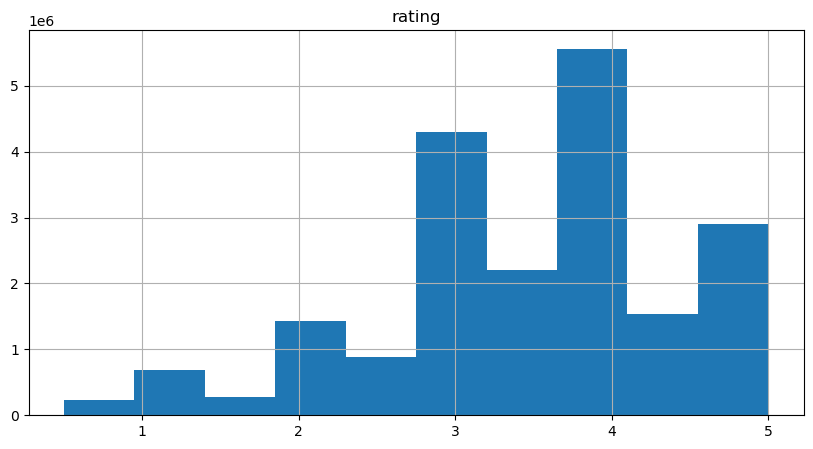

In [232]:
import matplotlib.pyplot as plt

%matplotlib inline

ratings.hist(column='rating', figsize=(10,5))
plt.show()

In [233]:
print(ratings.head())

   userId  movieId  rating
0       1        2     3.5
1       1       29     3.5
2       1       32     3.5
3       1       47     3.5
4       1       50     3.5


In [234]:
ratings.boxplot(column = 'rating',figsize=(10,5))

<Axes: >

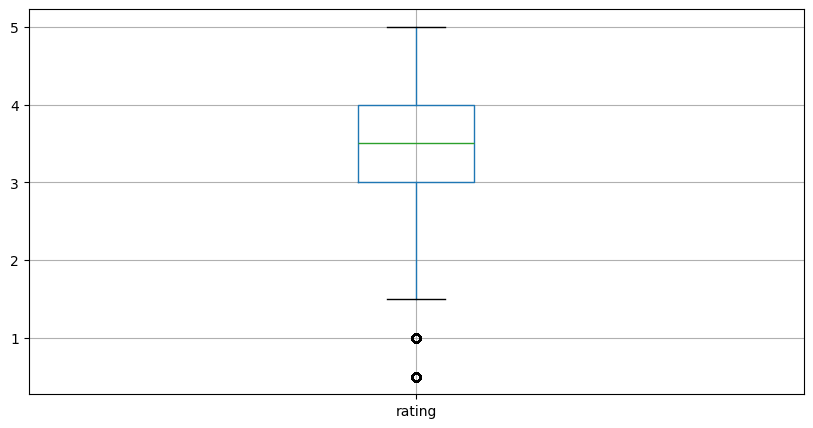

In [235]:
plt.show()

### SLICING OUT COLUMNA

In [237]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [238]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [241]:
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [242]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

tag
missing child                    1
Ron Moore                        1
Citizen Kane                     1
mullet                           1
biker gang                       1
Paul Adelstein                   1
the wig                          1
killer fish                      1
genetically modified monsters    1
topless scene                    1
Name: count, dtype: int64

In [243]:
len(tag_counts)

38643

In [244]:
tag_counts.head()

tag
sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
Name: count, dtype: int64

In [245]:
len(tags['tag'])

465548

In [246]:
tag_counts[:10].plot(kind='bar',figsize=(10,5))

<Axes: xlabel='tag'>

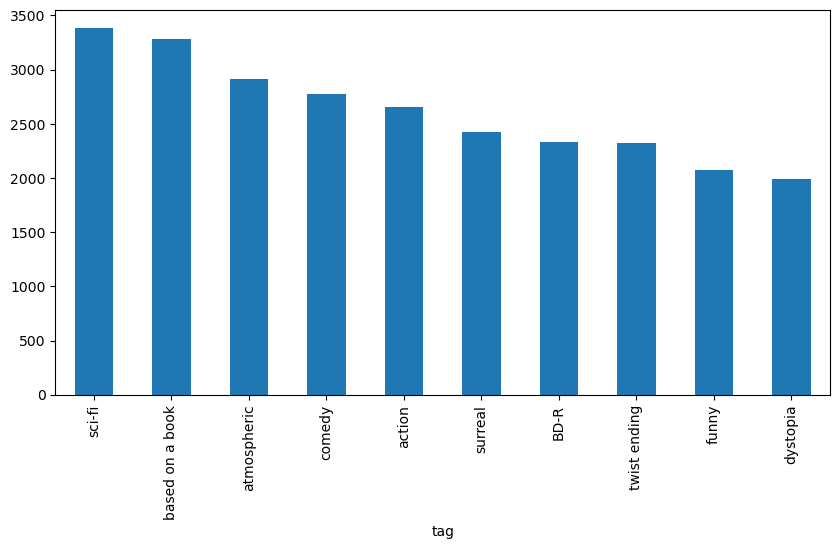

In [257]:
plt.show()

In [259]:
tag_counts[:10].plot(kind='pie',figsize=(10,5))


<Axes: ylabel='count'>

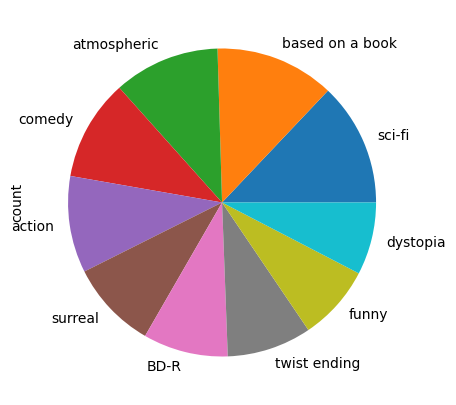

In [261]:
plt.show()

### FILTER FOR SELECTING ROWS

In [264]:
is_highly_rated = ratings['rating']>= 5.0
q=ratings[is_highly_rated][30:50]
q

,userId,movieId,rating
239,3,50,5.0
242,3,175,5.0
244,3,223,5.0
245,3,260,5.0
246,3,316,5.0
247,3,318,5.0
248,3,329,5.0
252,3,457,5.0
253,3,480,5.0
254,3,490,5.0


In [266]:
len(q)

20

In [268]:
is_action = movies['genres'].str.contains('Action')
movies[is_action][5:15]

,movieId,title,genres
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
69,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
70,71,Fair Game (1995),Action
75,76,Screamers (1995),Action|Sci-Fi|Thriller
77,78,"Crossing Guard, The (1995)",Action|Crime|Drama|Thriller
85,86,White Squall (1996),Action|Adventure|Drama


In [270]:
#give output in bool

is_action = movies['genres'].str.contains('Action')
print(is_action[5:15])

5      True
6     False
7     False
8      True
9      True
10    False
11    False
12    False
13    False
14     True
Name: genres, dtype: bool


In [272]:
movies[is_action].head(15)

,movieId,title,genres
5,6,Heat (1995),Action|Crime|Thriller
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller
14,15,Cutthroat Island (1995),Action|Adventure|Romance
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller


In [274]:
movies.head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


### GROUP BY AND AGGREGATE

In [277]:
ratings_count = ratings[['movieId','rating']].groupby('movieId').count()
ratings_count

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161
...,...
131254,1
131256,1
131258,1


In [279]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [281]:
#size() make the result cleaner
ratings_count = ratings[['movieId','rating']].groupby('rating').size()
ratings_count

rating
0.5     239125
1.0     680732
1.5     279252
2.0    1430997
2.5     883398
3.0    4291193
3.5    2200156
4.0    5561926
4.5    1534824
5.0    2898660
dtype: int64

In [283]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [285]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [287]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.tail()

,rating
movieId,
131254,4.0
131256,4.0
131258,2.5
131260,3.0
131262,4.0


### MERGE DATAFRAMES

In [290]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [292]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [294]:
t= movies.merge(tags,on='movieId',how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


### COMBINE AGGREGEATION < MERGING AND FILTERS TO GET USEFUL ANALYTICS

In [297]:
avg_ratings=ratings.groupby('movieId',as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [298]:
box_office = movies.merge(avg_ratings, on = 'movieId', how= 'inner')
box_office.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [299]:
print(avg_ratings.columns)

Index(['movieId', 'rating'], dtype='object')


In [300]:
is_highly_rated = box_office['rating'] >= 4.0
box_office[is_highly_rated][-5:]


,movieId,title,genres,rating
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [301]:
is_Adventure = box_office['genres'].str.contains('Adventure')
box_office[is_Adventure][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
7,8,Tom and Huck (1995),Adventure|Children,3.142049
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.430029
12,13,Balto (1995),Adventure|Animation|Children,3.272416


The function str.contains() is used to check if a particular substring exists within each row of a string column in a Pandas DataFrame.

In [308]:
is_Adventure = box_office['genres'].str.contains('Adventure')
print(is_Adventure)

0         True
1         True
2        False
3        False
4        False
         ...  
26739    False
26740    False
26741     True
26742    False
26743     True
Name: genres, Length: 26744, dtype: bool


Case Sensitivity → By default, str.contains() is case-sensitive.

If "adventure" is written in lowercase, it won’t match "Adventure".

To make it case-insensitive, use:⬇️


In [311]:
is_Adventure=box_office['genres'].str.contains('adventure', case=False)
box_office[is_Adventure][:5]


,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
7,8,Tom and Huck (1995),Adventure|Children,3.142049
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.430029
12,13,Balto (1995),Adventure|Animation|Children,3.272416


In [313]:
box_office[is_Adventure & is_highly_rated][-5:]

,movieId,title,genres,rating
26611,130586,Itinerary of a Spoiled Child (1988),Adventure|Drama,4.5
26655,130996,The Beautiful Story (1992),Adventure|Drama|Fantasy,5.0
26667,131050,Stargate SG-1 Children of the Gods - Final Cut...,Adventure|Sci-Fi|Thriller,5.0
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [315]:
[is_Adventure & is_highly_rated][-5:]#& operator if any val is false it will give false output


[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 26739    False
 26740    False
 26741    False
 26742    False
 26743     True
 Length: 26744, dtype: bool]

### Vectorized String Operations

In [318]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### SPLIT "GENRES" INTO MULTIPLE COLUMNS

In [321]:
movies_genres = movies['genres'].str.split('l',expand=True)

In [323]:
movies_genres

,0,1,2,3,4
0,Adventure|Animation|Chi,dren|Comedy|Fantasy,None,None,None
1,Adventure|Chi,dren|Fantasy,None,None,None
2,Comedy|Romance,None,None,None,None
3,Comedy|Drama|Romance,None,None,None,None
4,Comedy,None,None,None,None
...,...,...,...,...,...
27273,Comedy,None,None,None,None
27274,Comedy,None,None,None,None
27275,Adventure,None,None,None,None
27276,(no genres,isted),None,None,None


In [324]:
genres = movies['genres']
genres

0        Adventure|Animation|Children|Comedy|Fantasy
1                         Adventure|Children|Fantasy
2                                     Comedy|Romance
3                               Comedy|Drama|Romance
4                                             Comedy
                            ...                     
27273                                         Comedy
27274                                         Comedy
27275                                      Adventure
27276                             (no genres listed)
27277                       Adventure|Fantasy|Horror
Name: genres, Length: 27278, dtype: object

In [327]:
movies_genres[:10]

,0,1,2,3,4
0,Adventure|Animation|Chi,dren|Comedy|Fantasy,None,None,None
1,Adventure|Chi,dren|Fantasy,None,None,None
2,Comedy|Romance,None,None,None,None
3,Comedy|Drama|Romance,None,None,None,None
4,Comedy,None,None,None,None
5,Action|Crime|Thri,,er,None,None
6,Comedy|Romance,None,None,None,None
7,Adventure|Chi,dren,None,None,None
8,Action,None,None,None,None
9,Action|Adventure|Thri,,er,None,None


### ADD A NEW COLUMN FOR COMEDY GENRE FLAG

In [330]:
movies_genres['isComedy']= movies['genres'].str.contains('Comedy')#creates a new column 'iscomedy'

In [332]:
movies_genres[:10]

,0,1,2,3,4,isComedy
0,Adventure|Animation|Chi,dren|Comedy|Fantasy,None,None,None,True
1,Adventure|Chi,dren|Fantasy,None,None,None,False
2,Comedy|Romance,None,None,None,None,True
3,Comedy|Drama|Romance,None,None,None,None,True
4,Comedy,None,None,None,None,True
5,Action|Crime|Thri,,er,None,None,False
6,Comedy|Romance,None,None,None,None,True
7,Adventure|Chi,dren,None,None,None,False
8,Action,None,None,None,None,False
9,Action|Adventure|Thri,,er,None,None,False


### EXTRACT YEAR FROM TITLE E.G (2007)

In [335]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*',expand=True)

In [337]:
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


The .str.extract() function is used to extract a substring from each row using regular expressions (regex).

Regex pattern used:
'.*\((.*)\).*'

### PARSING TIMESTAMPS

In most cases, Pandas automatically detects ',' as the separator, so sep=',' is optional for regular CSV files.
However, if your CSV uses a different separator, it may cause issues.



In [342]:
tags = pd.read_csv(r"C:\Users\akaft\OneDrive\Desktop\Pandas\tag.csv",sep='|')

In [343]:
tags

,"userId,""movieId"",""tag"",""timestamp"""
0,"18,4141,""Mark Waters"",2009-04-24 18:19:40"
1,"65,208,""dark hero"",2013-05-10 01:41:18"
2,"65,353,""dark hero"",2013-05-10 01:41:19"
3,"65,521,""noir thriller"",2013-05-10 01:39:43"
4,"65,592,""dark hero"",2013-05-10 01:41:18"
...,...
465559,"138446,55999,""dragged"",2013-01-23 23:29:32"
465560,"138446,55999,""Jason Bateman"",2013-01-23 23:29:38"
465561,"138446,55999,""quirky"",2013-01-23 23:29:38"
465562,"138446,55999,""sad"",2013-01-23 23:29:32"


In [344]:
tags.dtypes

userId,"movieId","tag","timestamp"    object
dtype: object

In [345]:
tags1= pd.read_csv(r"C:\Users\akaft\OneDrive\Desktop\Pandas\tag.csv",sep=',',parse_dates=['timestamp'])
tags1.head()


,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [346]:
tags1

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
...,...,...,...,...
465559,138446,55999,dragged,2013-01-23 23:29:32
465560,138446,55999,Jason Bateman,2013-01-23 23:29:38
465561,138446,55999,quirky,2013-01-23 23:29:38
465562,138446,55999,sad,2013-01-23 23:29:32


In [347]:
tags1.dtypes

userId                int64
movieId               int64
tag                  object
timestamp    datetime64[ns]
dtype: object

In [351]:
tags1.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [356]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

KeyError: 'timestamp'

In [ ]:
tags1['parsed_time'] = pd.to_datetime(tags1['timestamp'], unit='s')
tags1

In [ ]:
tags1['parsed_time'].dtype

In [ ]:
tags1.head(2)

In [ ]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape,selected_rows.shape

In [ ]:
tags.sort_values(by='parsed_time',ascending=True)[:10]

### AVERAGE MOVIE RATINGS OVER TIME

Movie ratings related to the year of launch?

In [364]:
average_rating = ratings [['movieId','rating']].groupby('movieId',as_index=False).mean()
average_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [378]:
joined = movies.merge(average_rating, on="movieId",how="inner")
joined.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592


In [382]:
joined = movies.merge(average_rating, on="movieId", how="inner")  # Merge both DataFrames
print(joined.head())  # Show the first few rows
print(joined.corr())  # Show the correlation matrix


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  year    rating  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  3.921240  
1                   Adventure|Children|Fantasy  1995  3.211977  
2                               Comedy|Romance  1995  3.151040  
3                         Comedy|Drama|Romance  1995  2.861393  
4                                       Comedy  1995  3.064592  


ValueError: could not convert string to float: 'Toy Story (1995)'

In [388]:
joined = movies.merge(average_rating, on="movieId", how="inner")  # Merge DataFrames
print(joined.head())  # Show the first few rows

# Compute correlation only for numeric columns
numeric_cols = joined.select_dtypes(include=['number'])  # Select only numeric columns
print(numeric_cols.corr())  # Compute correlation


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  year    rating  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  3.921240  
1                   Adventure|Children|Fantasy  1995  3.211977  
2                               Comedy|Romance  1995  3.151040  
3                         Comedy|Drama|Romance  1995  2.861393  
4                                       Comedy  1995  3.064592  
          movieId    rating
movieId  1.000000 -0.090369
rating  -0.090369  1.000000
